In [27]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from scipy.integrate import odeint

In [28]:
M10 = 7
M20 = 7.7

p_cr = 27
N = 37
q = 1
tau1 = 17
tau2 = 16
p1 = 15
p2 = 12

In [29]:
t0 = 0
tmax = 30
dt = .01

t = np.arange(t0, tmax, dt)
t = np.append(t, tmax)
t

array([0.000e+00, 1.000e-02, 2.000e-02, ..., 2.998e+01, 2.999e+01,
       3.000e+01])

In [31]:
a1 = p_cr/(tau1*tau1*p1*p1*N*q)
a2 = p_cr/(tau2*tau2*p2*p2*N*q)
b = p_cr/(tau1*tau1*tau2*tau2*p1*p1*p2*p2*N*q)
c1 = (p_cr-p1)/(tau1*p1)
c2 = (p_cr-p2)/(tau2*p2)

# Первый случай

In [32]:
def syst1(begin, t):
    M1 = begin[0]
    M2 = begin[1]
    dM1dt = (c1/c1)*M1 - (a1/c1)*M1*M1 - (b/c1)*M1*M2
    dM2dt = (c2/c1)*M2 - (a2/c1)*M2*M2 - (b/c1)*M1*M2
    return (dM1dt, dM2dt)

In [33]:
v0 = (M10, M20)

In [34]:
yf = odeint(syst1, v0, t)
yf

array([[   7.        ,    7.7       ],
       [   7.07023257,    7.82864344],
       [   7.14116854,    7.95943151],
       ...,
       [4193.22627668, 3946.6021803 ],
       [4193.22627669, 3946.6021803 ],
       [4193.2262767 , 3946.6021803 ]])

In [35]:
M1 = []
M2 = []

for i in range(len(yf)):
    M1 = np.append(M1, yf[i][0])
    M2 = np.append(M2, yf[i][1])

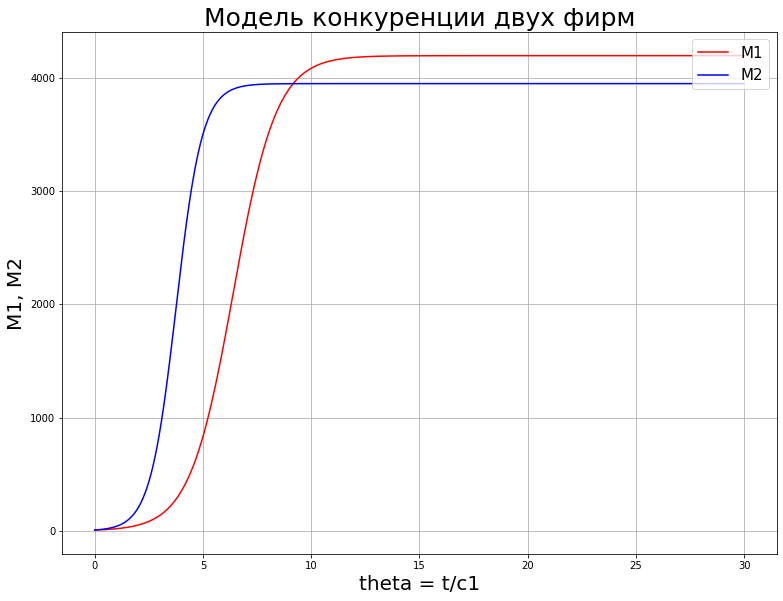

In [36]:
plt.figure(figsize=(12.8, 9.6))
plt.grid(True)
plt.title('Модель конкуренции двух фирм', fontsize=25)
plt.xlabel("theta = t/c1", fontsize=20)
plt.ylabel("M1, M2", fontsize=20)
plt.plot(t, M1, 'r', label='M1')
plt.plot(t, M2, 'b', label='M2')
plt.legend(loc='upper right', fontsize=15)

# Второй случай

In [37]:
def syst2(begin, t):
    M1 = begin[0]
    M2 = begin[1]
    dM1dt = (c1/c1)*M1 - (a1/c1)*M1*M1 - (b/c1)*M1*M2
    dM2dt = (c2/c1)*M2 - (a2/c1)*M2*M2 - (b/c1 + .00024)*M1*M2
    return (dM1dt, dM2dt)

In [38]:
v0 = (M10, M20)

In [39]:
yf = odeint(syst2, v0, t)
yf

array([[   7.        ,    7.7       ],
       [   7.07023257,    7.82851126],
       [   7.14116854,    7.95916139],
       ...,
       [4193.29117464, 1554.12605472],
       [4193.29117464, 1554.12605001],
       [4193.29117464, 1554.12604532]])

In [40]:
M1 = []
M2 = []

for i in range(len(yf)):
    M1 = np.append(M1, yf[i][0])
    M2 = np.append(M2, yf[i][1])

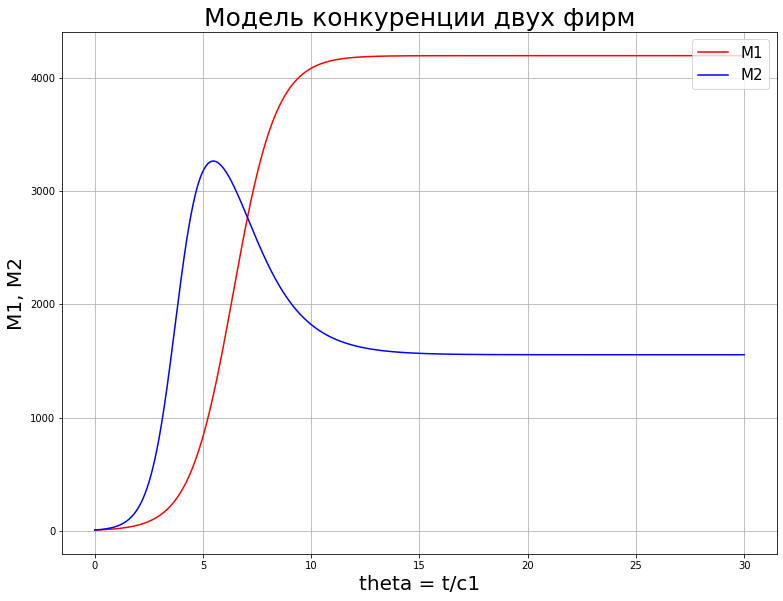

In [41]:
plt.figure(figsize=(12.8, 9.6))
plt.grid(True)
plt.title('Модель конкуренции двух фирм', fontsize=25)
plt.xlabel("theta = t/c1", fontsize=20)
plt.ylabel("M1, M2", fontsize=20)
plt.plot(t, M1, 'r', label='M1')
plt.plot(t, M2, 'b', label='M2')
plt.legend(loc='upper right', fontsize=15)